In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
df = pd.read_csv('df_english_labelled_verified.csv')

In [3]:
df = df[df['content'].notna()]

In [4]:
df = df.drop(columns =['Unnamed: 0', 'reviewId'])
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,is_english,label
0,Kemar Richardson,https://play-lh.googleusercontent.com/a-/ACNPE...,Great,5,0,26.3.4,10/4/2022 20:32,NaN,NaN,True,POSITIVE
1,Tracy Dunn,https://play-lh.googleusercontent.com/a/ALm5wu...,good,5,0,26.4.3,10/4/2022 20:31,NaN,NaN,True,POSITIVE
2,SG. Mugo. (Mugoz:),https://play-lh.googleusercontent.com/a-/ACNPE...,Good app,5,0,26.3.4,10/4/2022 20:30,NaN,NaN,True,POSITIVE
3,Mwansa Judy,https://play-lh.googleusercontent.com/a-/ACNPE...,Most amazing app,5,0,26.3.4,10/4/2022 20:29,NaN,NaN,True,POSITIVE
4,Muhammad Sajid,https://play-lh.googleusercontent.com/a-/ACNPE...,full Entertainment,4,0,25.9.4,10/4/2022 20:28,NaN,NaN,True,POSITIVE


In [5]:
import re

# Define a function to clean the text
def clean(text):
    text = str(text)
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['content'].apply(clean)
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,is_english,label,Cleaned Reviews
0,Kemar Richardson,https://play-lh.googleusercontent.com/a-/ACNPE...,Great,5,0,26.3.4,10/4/2022 20:32,NaN,NaN,True,POSITIVE,Great
1,Tracy Dunn,https://play-lh.googleusercontent.com/a/ALm5wu...,good,5,0,26.4.3,10/4/2022 20:31,NaN,NaN,True,POSITIVE,good
2,SG. Mugo. (Mugoz:),https://play-lh.googleusercontent.com/a-/ACNPE...,Good app,5,0,26.3.4,10/4/2022 20:30,NaN,NaN,True,POSITIVE,Good app
3,Mwansa Judy,https://play-lh.googleusercontent.com/a-/ACNPE...,Most amazing app,5,0,26.3.4,10/4/2022 20:29,NaN,NaN,True,POSITIVE,Most amazing app
4,Muhammad Sajid,https://play-lh.googleusercontent.com/a-/ACNPE...,full Entertainment,4,0,25.9.4,10/4/2022 20:28,NaN,NaN,True,POSITIVE,full Entertainment


In [7]:
import nltk

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,is_english,label,Cleaned Reviews,POS tagged
0,Kemar Richardson,https://play-lh.googleusercontent.com/a-/ACNPE...,Great,5,0,26.3.4,10/4/2022 20:32,NaN,NaN,True,POSITIVE,Great,"[(Great, n)]"
1,Tracy Dunn,https://play-lh.googleusercontent.com/a/ALm5wu...,good,5,0,26.4.3,10/4/2022 20:31,NaN,NaN,True,POSITIVE,good,"[(good, a)]"
2,SG. Mugo. (Mugoz:),https://play-lh.googleusercontent.com/a-/ACNPE...,Good app,5,0,26.3.4,10/4/2022 20:30,NaN,NaN,True,POSITIVE,Good app,"[(Good, a), (app, n)]"
3,Mwansa Judy,https://play-lh.googleusercontent.com/a-/ACNPE...,Most amazing app,5,0,26.3.4,10/4/2022 20:29,NaN,NaN,True,POSITIVE,Most amazing app,"[(amazing, a), (app, n)]"
4,Muhammad Sajid,https://play-lh.googleusercontent.com/a-/ACNPE...,full Entertainment,4,0,25.9.4,10/4/2022 20:28,NaN,NaN,True,POSITIVE,full Entertainment,"[(full, a), (Entertainment, n)]"


In [8]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,is_english,label,Cleaned Reviews,POS tagged,Lemma
0,Kemar Richardson,https://play-lh.googleusercontent.com/a-/ACNPE...,Great,5,0,26.3.4,10/4/2022 20:32,NaN,NaN,True,POSITIVE,Great,"[(Great, n)]",Great
1,Tracy Dunn,https://play-lh.googleusercontent.com/a/ALm5wu...,good,5,0,26.4.3,10/4/2022 20:31,NaN,NaN,True,POSITIVE,good,"[(good, a)]",good
2,SG. Mugo. (Mugoz:),https://play-lh.googleusercontent.com/a-/ACNPE...,Good app,5,0,26.3.4,10/4/2022 20:30,NaN,NaN,True,POSITIVE,Good app,"[(Good, a), (app, n)]",Good app
3,Mwansa Judy,https://play-lh.googleusercontent.com/a-/ACNPE...,Most amazing app,5,0,26.3.4,10/4/2022 20:29,NaN,NaN,True,POSITIVE,Most amazing app,"[(amazing, a), (app, n)]",amazing app
4,Muhammad Sajid,https://play-lh.googleusercontent.com/a-/ACNPE...,full Entertainment,4,0,25.9.4,10/4/2022 20:28,NaN,NaN,True,POSITIVE,full Entertainment,"[(full, a), (Entertainment, n)]",full Entertainment


In [9]:
df[['content', 'Lemma']]

,content,Lemma
0,Great,Great
1,good,good
2,Good app,Good app
3,Most amazing app,amazing app
4,full Entertainment,full Entertainment
...,...,...
99282,Best app in pakistan tik toker Soham anwar Th...,Best app pakistan tik toker Soham anwar Thanks
99283,Perfect,Perfect
99284,So nice,nice
99285,Its a great app,great app


In [16]:
fin_data = pd.DataFrame(df[['content', 'Lemma', 'label']])

In [17]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [18]:
# function to analyse 
def vader_analysis(compound):
    if compound >= 0.5:
        return 'POSITIVE'
    elif compound <= -0.5 :
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,content,Lemma,label,Vader Sentiment,Vader Analysis
0,Great,Great,POSITIVE,0.6249,POSITIVE
1,good,good,POSITIVE,0.4404,NEUTRAL
2,Good app,Good app,POSITIVE,0.4404,NEUTRAL
3,Most amazing app,amazing app,POSITIVE,0.5859,POSITIVE
4,full Entertainment,full Entertainment,POSITIVE,0.4215,NEUTRAL


In [19]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

NEUTRAL     60427
POSITIVE    33210
NEGATIVE     3359
Name: Vader Analysis, dtype: int64

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(fin_data['label'], fin_data['Vader Analysis'])

print("Accuracy: {}\n".format(accuracy))

# Show the classification report
print(classification_report(fin_data['label'], fin_data['Vader Analysis']))

Accuracy: 0.6051074271103963

              precision    recall  f1-score   support

    NEGATIVE       0.92      0.32      0.48      9653
     NEUTRAL       0.38      0.99      0.55     23474
    POSITIVE       0.98      0.51      0.67     63869

    accuracy                           0.61     96996
   macro avg       0.76      0.60      0.57     96996
weighted avg       0.83      0.61      0.62     96996



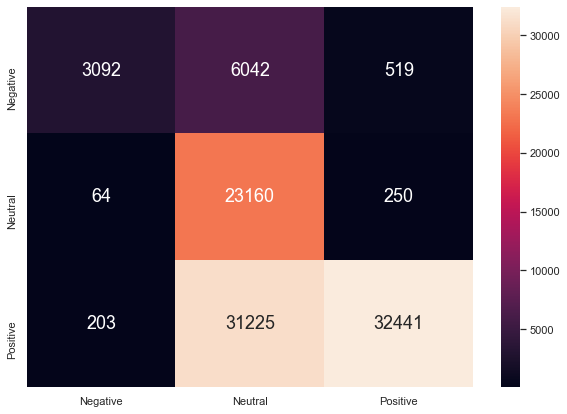

In [28]:
plt.figure(figsize=(10, 7))
ax = sb.heatmap(confusion_matrix(fin_data['label'], fin_data['Vader Analysis']), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
ax.xaxis.set_ticklabels(['Negative', 'Neutral', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive']);

([<matplotlib.patches.Wedge at 0x1b0241a4bb0>,
 [Text(-0.4521909784218673, 1.1115409659719584, 'NEUTRAL'),
  Text(0.3014244915169892, -1.057895682907216, 'POSITIVE'),
  Text(1.0934965306310989, -0.11943758829510205, 'NEGATIVE')],
 [Text(-0.2637780707460893, 0.6483988968169757, '62.3%'),
  Text(0.16441335900926682, -0.5770340088584813, '34.2%'),
  Text(0.5964526530715084, -0.06514777543369202, '3.5%')])

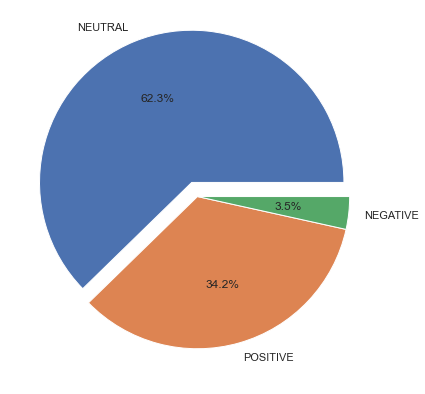

In [26]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()